In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

### Некоторые методы предобработки данных
 - Визуализация
 
 
 
 
    

In [57]:
url = "https://raw.githubusercontent.com/zaharovadasha/ml_autumn_2020/master/adult.csv"
data_raw = pd.read_csv(url)

In [58]:
type(data_raw)

pandas.core.frame.DataFrame

Таблица содержит данные о более 32 тысяч людей с указанием их дохода за один год, основываясь на данных перепеси населения. Для каждого человека указаны возраст, рабочий класс, образование, семейное положение, род деятельности, отношения, раса, пол, прирост капитала, потеря капитала, количество рабочих часов в неделю, родная страна, доход.

Вначале посмотрим на размеры таблицы-количество строк (каждая строка соответсвует одному человеку) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [59]:
data_raw.shape

(32561, 15)

In [60]:
data_raw.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [61]:
data_raw.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
data_raw

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Мы видим, что столбцы (признаки) имеют имена 
- `age` - возраст 
- `workclass` - рабочий класс
- `fnlwgt`- The # of people the census takers believe that observation represents (final weight)
- `education` - образование
- `education.num` - количество классов
- `marital.status` - семейное положение
- `occupation` - род деятельности
- `relationship` - отношения
- `race` - раса
- `sex` - пол
- `capital.gain` - прирост капитала
- `capital.loss` - потеря капитала
- `hours.per.week` - количество рабочих часов в неделю
- `native.country` - родная страна
- `income` - доход (в тыс. руб.)

Признаки `workclass`, `education`, `marital.status`, `occupation`, `relationship`, `race`, `native.country` - номинальный (категориальный), `sex`, `income` - бинарный, остальные признаки - количественные (числовые). 

Требуется классифицировать людей по их доходу(больше 50к, меньше 50к). Это *задача классификации*.

### Визуализация данных

In [63]:
print(data_raw.shape)
print(data_raw.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [64]:
data_raw.index

RangeIndex(start=0, stop=32561, step=1)

In [65]:
data_raw.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

In [67]:
data_raw.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Построим диаграмму рассеивания:

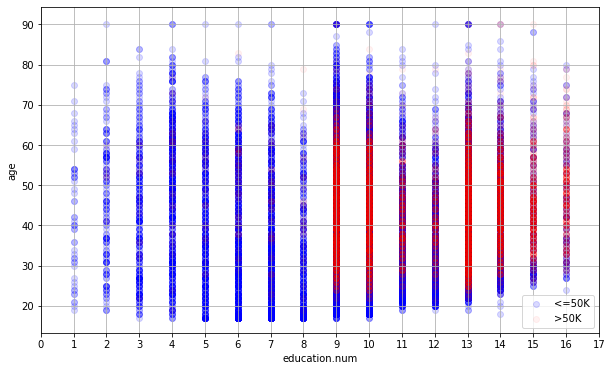

In [70]:
plt.figure(figsize = (10, 6))

plt.scatter(data_raw[data_raw['income'] == '<=50K']['education.num'],
            data_raw[data_raw['income'] == '<=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data_raw[data_raw['income'] == '>50K']['education.num'],
            data_raw[data_raw['income'] == '>50K']['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('education.num')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('age')
plt.legend()
plt.grid()

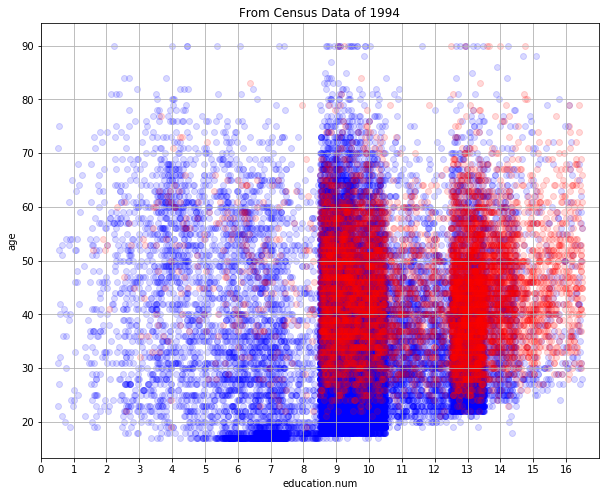

In [71]:
np.random.seed(0)
education_num_rnd = data_raw['education.num'] + np.random.rand(data_raw.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data_raw['income'] == '<=50K'],
            data_raw[data_raw['income'] == '<=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(education_num_rnd[data_raw['income'] == '>50K'],
            data_raw[data_raw['income'] == '>50K']['age'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.xlabel('education.num')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.title('From Census Data of 1994')
plt.grid()

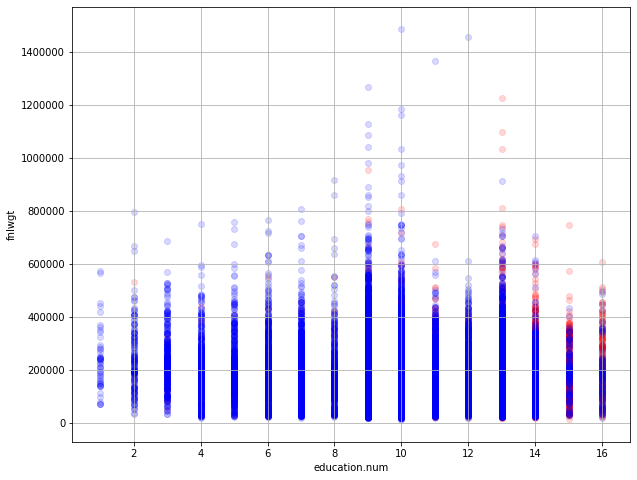

In [72]:
plt.figure(figsize = (10, 8))

plt.scatter(data_raw[data_raw['income'] == '>50K']['education.num'],
            data_raw[data_raw['income'] == '>50K']['fnlwgt'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.scatter(data_raw[data_raw['income'] == '<=50K']['education.num'],
            data_raw[data_raw['income'] == '<=50K']['fnlwgt'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.xlabel('education.num')
plt.ylabel('fnlwgt')
plt.grid()

### Обработка пропущенных значений

In [76]:
data_raw.median(axis = 0)

age                   37.0
fnlwgt            178356.0
education.num         10.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
dtype: float64

In [77]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)

In [78]:
data_raw[numerical_columns].count(axis = 0)

age               32561
fnlwgt            32561
education.num     32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
dtype: int64

In [79]:
data_raw['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [81]:
data_raw.loc[data_raw.workclass == "?", 'workclass'] = None

In [82]:
data_raw.describe(include = [object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [83]:
type(data_raw['workclass'].describe())

pandas.core.series.Series

In [84]:
data_raw['workclass'].describe().top

'Private'

In [85]:
data_raw['workclass'] = data_raw['workclass'].fillna('Private')

In [86]:
data_raw.describe(include = [object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


In [87]:
data_describe = data_raw.describe(include = [object])
for c in categorical_columns:
    data_raw[c] = data_raw[c].fillna(data_describe[c]['top'])

In [88]:
data_raw.describe(include = [object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


### Обработка категориальных признаков

In [73]:
data_raw['workclass'].dtype.name

'object'

In [74]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [75]:
for c in categorical_columns:
    print(c, data_raw[c].unique())

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex ['Female' 'Male']
native.country ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' '

### Векторизация


In [89]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'income'] ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


In [90]:
data_raw['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [92]:
data_raw.at[data_raw['sex'] == 'Male', 'sex'] = 0
data_raw.at[data_raw['sex'] == 'Female', 'sex'] = 1
data_raw['sex'].describe()

count    32561.000000
mean         0.330795
std          0.470506
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

In [93]:
data_raw['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

Заменим признак race 5 признаками: race_White, race_Black, ..., race_Other.

Если признак race принимает значение White, то признак race_White равен 1, а все остальные равны 0.
Если признак race принимает значение Black, то признак race_Black равен 1, а все остальные равны 0.
и т.д.

In [94]:
data_raw[nonbinary_columns]

,workclass,education,marital.status,occupation,relationship,race,native.country
0,Private,HS-grad,Widowed,?,Not-in-family,White,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,United-States
2,Private,Some-college,Widowed,?,Unmarried,Black,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,United-States
...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States


In [95]:
data_nonbinary = pd.get_dummies(data_raw[nonbinary_columns])
print(data_nonbinary.columns)

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',


In [96]:
len(data_nonbinary.columns)

99

### Нормализация количественных признаков

каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [98]:
data_numerical = data_raw[numerical_columns]
data_numerical.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [100]:
data_numerical.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,1.526373e-16,-8.107090e-17,-1.154839e-14,-6.458148e-14,4.464363e-14,-4.106362e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-1.459182e-01,-2.166562e-01,-3.193981e+00
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-1.459182e-01,-2.166562e-01,-3.542890e-02
75%,6.904732e-01,4.478697e-01,7.460277e-01,-1.459182e-01,-2.166562e-01,3.695137e-01
max,3.769554e+00,1.226837e+01,2.300802e+00,1.339437e+01,1.059334e+01,4.742894e+00


### Соединяем все в одну таблицу


In [102]:
data_raw = pd.concat((data_numerical, data_nonbinary, data_raw[binary_columns]), axis = 1)
print(data_raw.shape)
#print data.columns

(32561, 107)


In [103]:
data_raw.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.526373e-16,-8.107090e-17,-1.154839e-14,-6.458148e-14,4.464363e-14,-4.106362e-15,0.029483,0.064279,0.000215,0.753417,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491,0.330795
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.169159,0.245254,0.014661,0.431029,...,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162,0.470506
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-1.459182e-01,-2.166562e-01,-3.193981e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-1.459182e-01,-2.166562e-01,-3.542890e-02,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.904732e-01,4.478697e-01,7.460277e-01,-1.459182e-01,-2.166562e-01,3.695137e-01,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.769554e+00,1.226837e+01,2.300802e+00,1.339437e+01,1.059334e+01,4.742894e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### X и y

In [104]:
X = data_raw.drop('income', axis = 1) # выбрасываем столбец 'income'
y = data_raw['income']
feature_names = X.columns

In [106]:
type(feature_names)

pandas.core.indexes.base.Index

In [107]:
feature_names

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native.country_Puerto-Rico', 'native.country_Scotland',
       'native.country_South', 'native.country_Taiwan',
       'native.country_Thailand', 'native.country_Trinadad&Tobago',
       'native.country_United-States', 'native.country_Vietnam',
       'native.country_Yugoslavia', 'sex'],
      dtype='object', length=106)

In [108]:
X = X.to_numpy()

In [110]:
y = np.array(y != '<=50K', dtype='int')

In [111]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [112]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32561, 106)
(32561,)


In [113]:
type(X)

numpy.ndarray

In [114]:
type(y)

numpy.ndarray

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

22792 9769


### $k$NN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [117]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [118]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [119]:
err_test = 1 - knn.score(X_test, y_test)

In [120]:
err_test

0.16091718702016589

In [121]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[6928  501]
 [1071 1269]]


In [122]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подбор параметров 

In [123]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.15685328185328185 20


In [124]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.14206739206739208 0.15641314361756578
